### BPIC2015
Bucket: Single

Encoding: Aggregation

Classifier: XGBoost

The notebook has all the code for running the benchmark and deriving explanations

In [13]:
import EncoderFactory
from DatasetManager import DatasetManager
import BucketFactory

import pandas as pd
import numpy as np

from sklearn.metrics import roc_auc_score
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.preprocessing import StandardScaler

import time
import os
import sys
from sys import argv
import pickle
from collections import defaultdict

from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

import lime
import lime.lime_tabular
from lime import submodular_pick;
import warnings
warnings.filterwarnings('ignore')

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

def imp_df(column_names, importances):
        df = pd.DataFrame({'feature': column_names,
                       'feature_importance': importances}) \
           .sort_values('feature_importance', ascending = False) \
           .reset_index(drop = True)
        return df

# plotting a feature importance dataframe (horizontal barchart)
def var_imp_plot(imp_df, title, num_feat):
        imp_df.columns = ['feature', 'feature_importance']
        b= sns.barplot(x = 'feature_importance', y = 'feature', data = imp_df.head(num_feat), orient = 'h', palette="Blues_r") \
           .set_title(title, fontsize = 14)
 

In [15]:
def generate_global_explanations(train_X,train_Y, cls, feature_combiner):
    
    print("The number of testing instances is ",len(train_Y))
    print("The total number of columns is",train_X.shape[1]);
    print("The total accuracy is ",cls.score(train_X,train_Y));
       
    sns.set(rc={'figure.figsize':(10,10), "font.size":18,"axes.titlesize":18,"axes.labelsize":18})
    sns.set
    feat_names = feature_combiner.get_feature_names()
    base_imp = imp_df(feat_names, cls.feature_importances_)
    base_imp.head(15)
    var_imp_plot(base_imp, 'Feature importance using XGBoost', 15)
    return base_imp
    

In [16]:
from lime import submodular_pick
def generate_local_explanations(explainer,test_xi, cls,test_y, submod=False, test_all_data=None):
    
    print("Actual value ", test_y)
    num_features=6;# maximum is 6 ,if it is larger than 6, the features displayed are different.
    exp = explainer.explain_instance(test_xi, 
                                 cls.predict_proba, num_features=num_features, labels=[0,1])
    
    #exp.show_in_notebook(show_table=True, show_all=False);
    probability_result=cls.predict_proba([test_xi])[0];
    print(probability_result);
    print ('Explanation for class %s' % class_names[1])
    print ('\n'.join(map(str, exp.as_list(label=1))))
    return exp
    #%matplotlib inline
    #fig = exp.as_pyplot_figure()
        
    if submod==True:
        sp_obj=submodular_pick.SubmodularPick(explainer, test_all_data, cls.predict_proba, 
                                      sample_size=20, num_features=num_features,num_exps_desired=4)
        [exp.as_pyplot_figure(label=exp.available_labels()[0]) for exp in sp_obj.sp_explanations];

In [8]:

dataset_ref = "bpic2015"
params_dir = "params"
results_dir = "results"
bucket_method = "single"
cls_encoding = "agg"
cls_method = "xgboost"
gap = 1
n_iter = 1

if bucket_method == "state":
    bucket_encoding = "last"
else:
    bucket_encoding = "agg"

method_name = "%s_%s"%(bucket_method, cls_encoding)

dataset_ref_to_datasets = {
    #"bpic2011": ["bpic2011_f%s"%formula for formula in range(1,5)],
    "bpic2015": ["bpic2015_%s_f2"%(municipality) for municipality in range(5,6)],
    "bpic2011": ["bpic2011_f%s"%formula for formula in range(4,5)],
    "bpic2012" : ["bpic2012_accepted"]
    #"insurance": ["insurance_activity", "insurance_followup"],
    #"sepsis_cases": ["sepsis_cases_1", "sepsis_cases_2", "sepsis_cases_4"]
}

encoding_dict = {
    "laststate": ["static", "last"],
    "agg": ["static", "agg"],
    "index": ["static", "index"],
    "combined": ["static", "last", "agg"]
}

datasets = [dataset_ref] if dataset_ref not in dataset_ref_to_datasets else dataset_ref_to_datasets[dataset_ref]
methods = encoding_dict[cls_encoding]
    
train_ratio = 0.8
random_state = 22

# create results directory
if not os.path.exists(os.path.join(params_dir)):
    os.makedirs(os.path.join(params_dir))
    
print(datasets)

['bpic2015_5_f2']


{'colsample_bytree': 0.7472337630097681, 'learning_rate': 0.27334407583275244, 'max_depth': 14, 'min_child_weight': 3, 'subsample': 0.9118886083418676}
single
Bucket 1
number events 7989
Training model iteration  0
The number of testing instances is  31964
The total number of columns is 349
The total accuracy is  0.9999687148041547
(159915, 37)
(10, 37) 0 [0.01414045]
Generating local Explanations for 0    10061280_10
Name: Case ID, dtype: object
Actual value  [0]
[0.9858596  0.01414045]
Explanation for class deviant
('agg__Activity_08_AWB45_020_2 <= 0.00', -0.7262421226037242)
('agg__Activity_08_AWB45_010 <= 0.00', -0.26751146443119916)
('agg__Activity_01_HOOFD_200 <= 0.00', 0.07107531379413795)
('agg__Activity_01_HOOFD_195 <= 0.00', 0.0659951826475748)
('63.23 < static__SUMleges <= 210.75', -0.058275976426380716)
('0.00 < static__Bouw <= 1.00', 0.05644844170431678)
(25, 37) 0 [1.0954032e-05]
Generating local Explanations for 0    10061280_25
Name: Case ID, dtype: object
Actual value 

(25, 37) 1 [0.9989961]
Generating local Explanations for 0    10103656_25
Name: Case ID, dtype: object
Actual value  [1]
[0.00100392 0.9989961 ]
Explanation for class deviant
('agg__Activity_08_AWB45_020_2 > 0.00', 0.7281994479587004)
('agg__Activity_08_AWB45_010 > 0.00', 0.28100869697905073)
('static__SUMleges > 861.93', 0.1631909345515805)
('agg__Activity_01_HOOFD_200 <= 0.00', 0.0739308629694346)
('0.00 < static__Bouw <= 1.00', 0.057961476970341416)
('agg__Activity_01_HOOFD_195 <= 0.00', 0.05179877919268216)
(5, 37) 1 [0.03849336]
Generating local Explanations for 0    10103656_5
Name: Case ID, dtype: object
Actual value  [1]
[0.96150666 0.03849336]
Explanation for class deviant
('agg__Activity_08_AWB45_020_2 <= 0.00', -0.7172383765695657)
('agg__Activity_08_AWB45_010 <= 0.00', -0.2643023551292018)
('static__SUMleges > 861.93', 0.16824482698240922)
('agg__Activity_01_HOOFD_200 <= 0.00', 0.07178808838960424)
('agg__Activity_01_HOOFD_195 <= 0.00', 0.06242700347151064)
('0.00 < static_

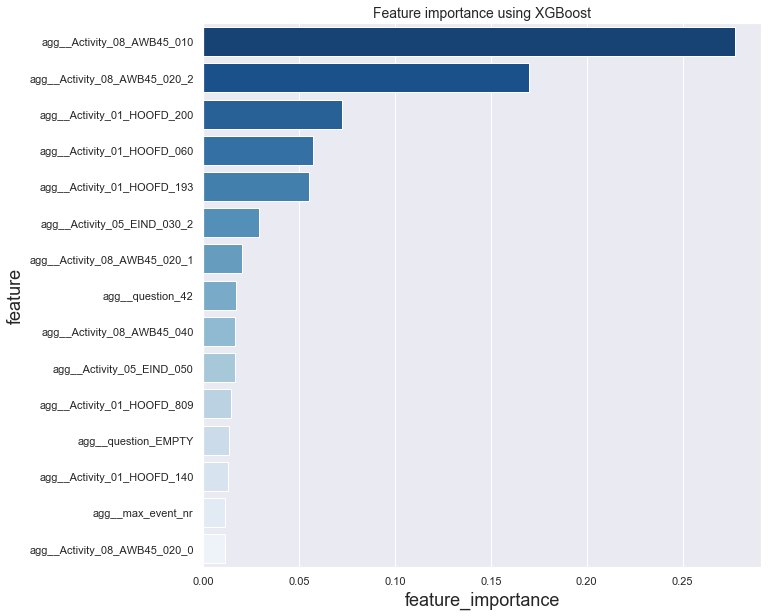

In [9]:
for dataset_name in datasets:
    
    # load optimal params
    optimal_params_filename = os.path.join(params_dir, "optimal_params_%s_%s_%s.pickle" % (cls_method, dataset_name, method_name))
    if not os.path.isfile(optimal_params_filename) or os.path.getsize(optimal_params_filename) <= 0:
        continue
        
    with open(optimal_params_filename, "rb") as fin:
        args = pickle.load(fin)
        
    print(args)
    
    # read the data
    dataset_manager = DatasetManager(dataset_name)
    data = dataset_manager.read_dataset()
    cls_encoder_args = {'case_id_col': dataset_manager.case_id_col, 
                        'static_cat_cols': dataset_manager.static_cat_cols,
                        'static_num_cols': dataset_manager.static_num_cols, 
                        'dynamic_cat_cols': dataset_manager.dynamic_cat_cols,
                        'dynamic_num_cols': dataset_manager.dynamic_num_cols, 
                        'fillna': True}

    # determine min and max (truncated) prefix lengths
    min_prefix_length = 1
    if "traffic_fines" in dataset_name:
        max_prefix_length = 10
    elif "bpic2017" in dataset_name:
        max_prefix_length = min(20, dataset_manager.get_pos_case_length_quantile(data, 0.90))
    else:
        max_prefix_length = min(40, dataset_manager.get_pos_case_length_quantile(data, 0.90))

    # split into training and test
    train, test = dataset_manager.split_data_strict(data, train_ratio, split="temporal")
    
    if gap > 1:
        outfile = os.path.join(results_dir, "performance_results_%s_%s_%s_gap%s.csv" % (cls_method, dataset_name, method_name, gap))
    else:
        outfile = os.path.join(results_dir, "performance_results_%s_%s_%s.csv" % (cls_method, dataset_name, method_name))
        
    start_test_prefix_generation = time.time()
    dt_test_prefixes = dataset_manager.generate_prefix_data(test, min_prefix_length, max_prefix_length)
    test_prefix_generation_time = time.time() - start_test_prefix_generation
            
    offline_total_times = []
    online_event_times = []
    train_prefix_generation_times = []

    impotance=None
    #storing local explanations
    exp_dlist=[]
    exp_rlist=[]
    for ii in range(n_iter):
        # create prefix logs
        start_train_prefix_generation = time.time()
        dt_train_prefixes = dataset_manager.generate_prefix_data(train, min_prefix_length, max_prefix_length, gap)
        train_prefix_generation_time = time.time() - start_train_prefix_generation
        train_prefix_generation_times.append(train_prefix_generation_time)
            
        # Bucketing prefixes based on control flow
        bucketer_args = {'encoding_method':bucket_encoding, 
                         'case_id_col':dataset_manager.case_id_col, 
                         'cat_cols':[dataset_manager.activity_col], 
                         'num_cols':[], 
                         'random_state':random_state}
        if bucket_method == "cluster":
            bucketer_args["n_clusters"] = int(args["n_clusters"])
        bucketer = BucketFactory.get_bucketer(bucket_method, **bucketer_args)

        start_offline_time_bucket = time.time()
        bucket_assignments_train = bucketer.fit_predict(dt_train_prefixes)
        offline_time_bucket = time.time() - start_offline_time_bucket

        bucket_assignments_test = bucketer.predict(dt_test_prefixes)

        preds_all = []
        test_y_all = []
        nr_events_all = []
        offline_time_fit = 0
        current_online_event_times = []
        
        for bucket in set(bucket_assignments_test):
            print("Bucket" , bucket )
            if bucket_method == "prefix":
                current_args = args[bucket]
            else:
                current_args = args
            relevant_train_cases_bucket = dataset_manager.get_indexes(dt_train_prefixes)[bucket_assignments_train == bucket]
            relevant_test_cases_bucket = dataset_manager.get_indexes(dt_test_prefixes)[bucket_assignments_test == bucket]
            dt_test_bucket = dataset_manager.get_relevant_data_by_indexes(dt_test_prefixes, relevant_test_cases_bucket)
            
            nr_events_all.extend(list(dataset_manager.get_prefix_lengths(dt_test_bucket)))
            print('number events', len(nr_events_all))
            
            if len(relevant_train_cases_bucket) == 0:
                preds = [dataset_manager.get_class_ratio(train)] * len(relevant_test_cases_bucket)
                current_online_event_times.extend([0] * len(preds))
            else:
                dt_train_bucket = dataset_manager.get_relevant_data_by_indexes(dt_train_prefixes, relevant_train_cases_bucket) # one row per event
                train_y = dataset_manager.get_label_numeric(dt_train_bucket)

                if len(set(train_y)) < 2:
                    preds = [train_y[0]] * len(relevant_test_cases_bucket)
                    current_online_event_times.extend([0] * len(preds))
                    test_y_all.extend(dataset_manager.get_label_numeric(dt_test_bucket))
                else:
                    start_offline_time_fit = time.time()
                    feature_combiner = FeatureUnion([(method, EncoderFactory.get_encoder(method, **cls_encoder_args)) for method in methods])

                    if cls_method == "rf":
                        cls = RandomForestClassifier(n_estimators=500,
                                                     max_features=current_args['max_features'],
                                                     random_state=random_state)

                    elif cls_method == "xgboost":
                        cls = xgb.XGBClassifier(objective='binary:logistic',
                                                n_estimators=500,
                                                learning_rate= current_args['learning_rate'],
                                                subsample=current_args['subsample'],
                                                max_depth=int(current_args['max_depth']),
                                                colsample_bytree=current_args['colsample_bytree'],
                                                min_child_weight=int(current_args['min_child_weight']),
                                                seed=random_state)

                    elif cls_method == "logit":
                        cls = LogisticRegression(C=2**current_args['C'],
                                                 random_state=random_state)

                    elif cls_method == "svm":
                        cls = SVC(C=2**current_args['C'],
                                  gamma=2**current_args['gamma'],
                                  random_state=random_state)

                    if cls_method == "svm" or cls_method == "logit":
                        pipeline = Pipeline([('encoder', feature_combiner), ('scaler', StandardScaler()), ('cls', cls)])
                    else:
                        pipeline = Pipeline([('encoder', feature_combiner), ('cls', cls)])

                    pipeline.fit(dt_train_bucket, train_y)
                    #get the explainations for the model now
        
                    print("Training model iteration ", ii )
                    
                    #get the training data as a matrix
                    trainingdata=feature_combiner.fit_transform(dt_train_bucket);
                    importance = generate_global_explanations(trainingdata,train_y, cls, feature_combiner)
                    #create an explainer now that can be passed later
                    class_names=['regular','deviant']# regular is 0, deviant is 1, 0 is left, 1 is right
                    explainer = lime.lime_tabular.LimeTabularExplainer(trainingdata,
                                                    feature_names = feature_combiner.get_feature_names(),
                                                   class_names=class_names, discretize_continuous=True)
                    
                    
                    offline_time_fit += time.time() - start_offline_time_fit

                    # predict separately for each prefix case
                    preds = []
                    
                    test_all_grouped = dt_test_bucket.groupby(dataset_manager.case_id_col)
                    print(dt_test_bucket.shape)
                    count_d=0 # count for deviant
                    count_r=0 #count for regular
                    for _, group in test_all_grouped:
                        
                        test_y_group = dataset_manager.get_label_numeric(group)
                        test_y_all.extend(test_y_group)
                            
                        start = time.time()
                        _ = bucketer.predict(group)
                        
                        if cls_method == "svm":
                            pred = pipeline.decision_function(group)
                        else:
                            preds_pos_label_idx = np.where(cls.classes_ == 1)[0][0]
                            pred = pipeline.predict_proba(group)[:,preds_pos_label_idx]
                            #print(test_y_group)
                            if group.shape[0] in [5,10,25] and (count_d<9 or count_r<9):
                                print(group.shape,test_y_group[0], pred)
                                test_x_group= feature_combiner.fit_transform(group) 
                                test_x=np.transpose(test_x_group[0])
                                print('Generating local Explanations for', dataset_manager.get_case_ids(group))
                                exp=generate_local_explanations(explainer, test_x, cls, test_y_group )
                                if(test_y_group[0]==1):
                                    count_d=count_d+1
                                    exp_dlist.append(exp)
                                else:
                                    count_r=count_r+1
                                    exp_rlist.append(exp)
                        pipeline_pred_time = time.time() - start
                        current_online_event_times.append(pipeline_pred_time / len(group))
                        preds.extend(pred)
                        

            preds_all.extend(preds)

      
   
        dt_results = pd.DataFrame({"actual": test_y_all, "predicted": preds_all, "nr_events": nr_events_all})
        for nr_events, group in dt_results.groupby("nr_events"):
            if len(set(group.actual)) < 2:
                print(dataset_name, method_name, cls_method, nr_events, "auc", np.nan)
            else:
                print(dataset_name, method_name, cls_method, nr_events, "auc", roc_auc_score(group.actual, group.predicted))
        print(dataset_name, method_name, cls_method, -1, -1, "auc", roc_auc_score(dt_results.actual, dt_results.predicted))
        

        
            


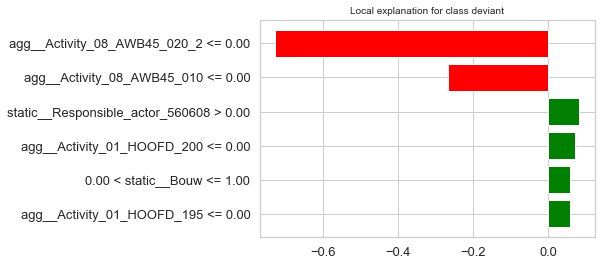

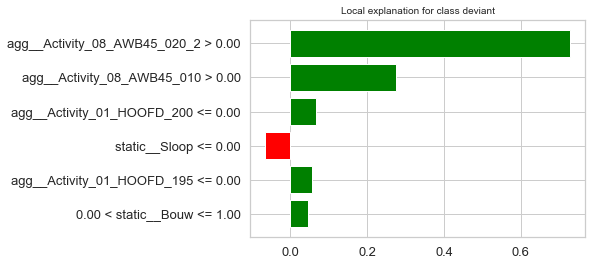

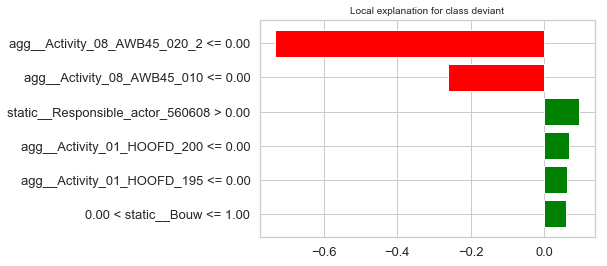

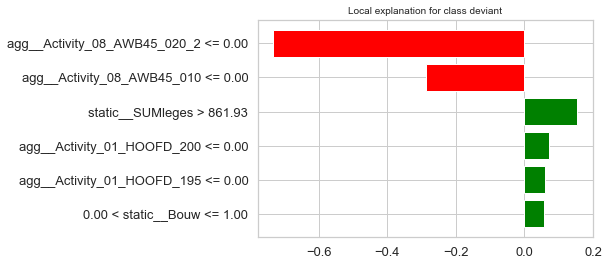

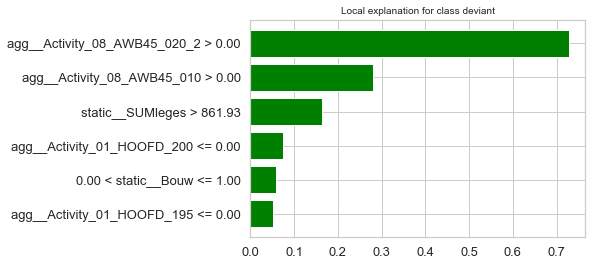

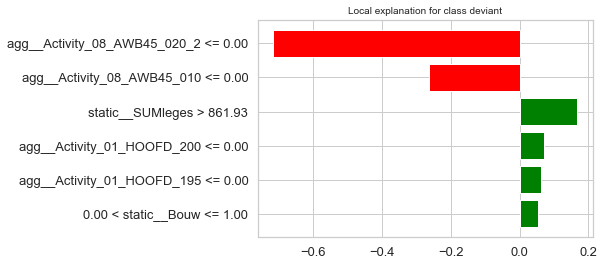

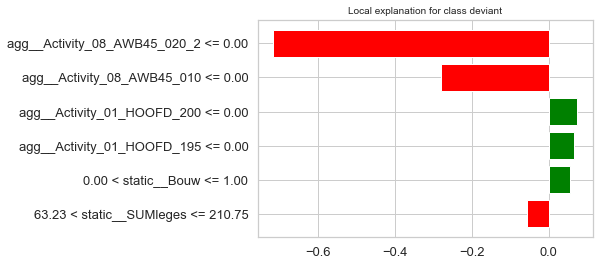

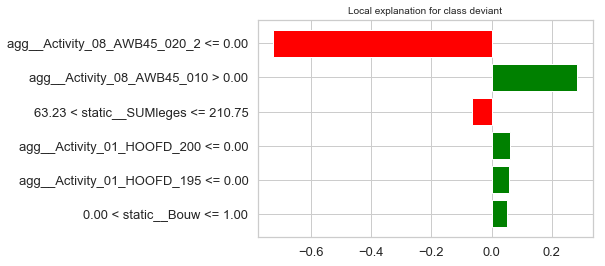

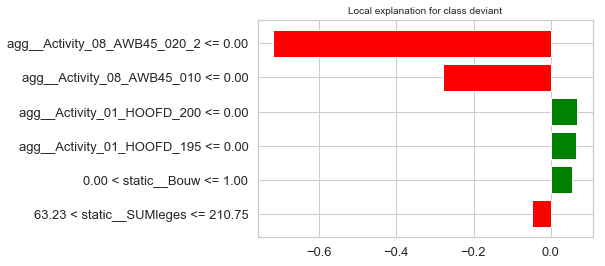

In [11]:
rc={'axes.labelsize': 12, 'xtick.labelsize': 13, 'ytick.labelsize': 13 , 'axes.titlesize': 10}
sns.set(rc)
sns.set_style("whitegrid")
%matplotlib inline
for exp in exp_dlist:
    fig = exp.as_pyplot_figure()

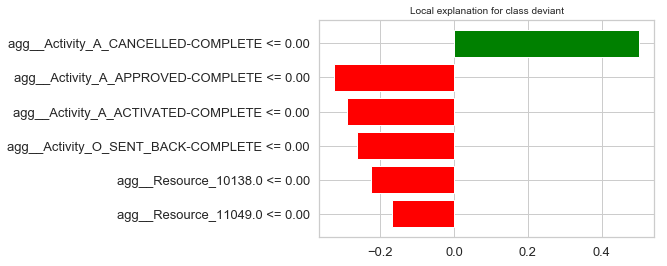

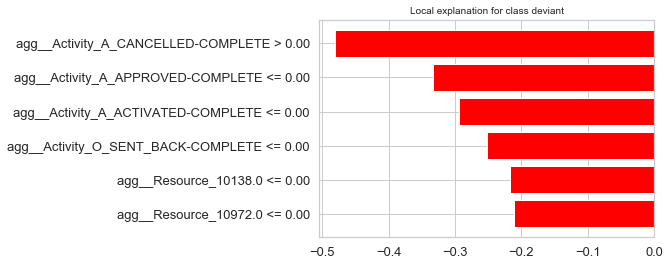

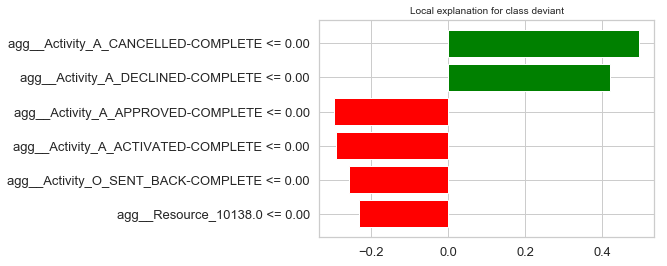

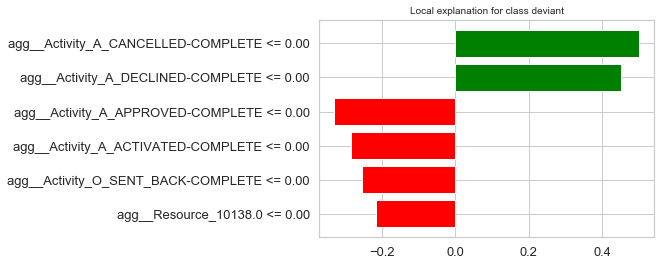

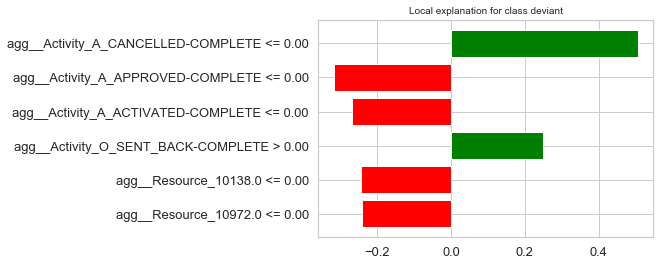

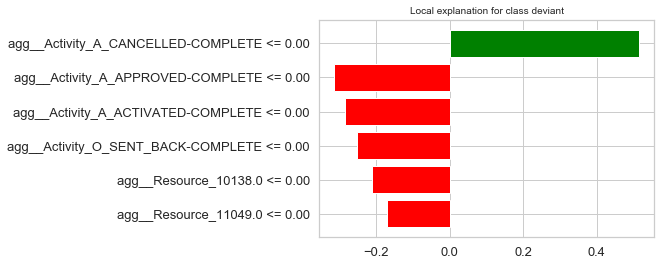

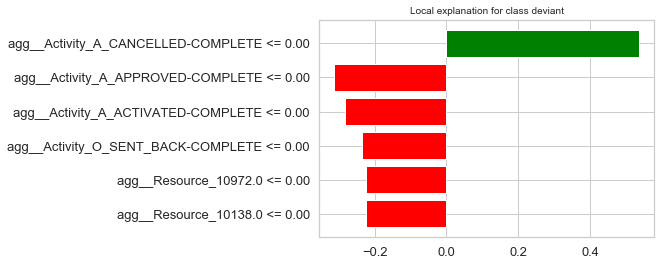

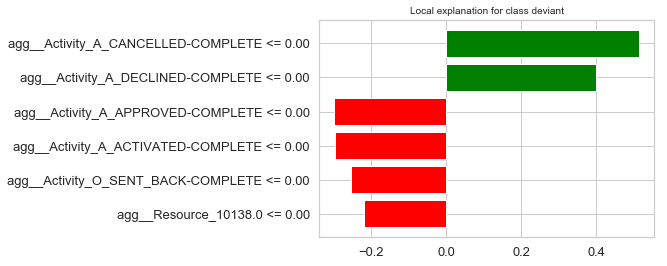

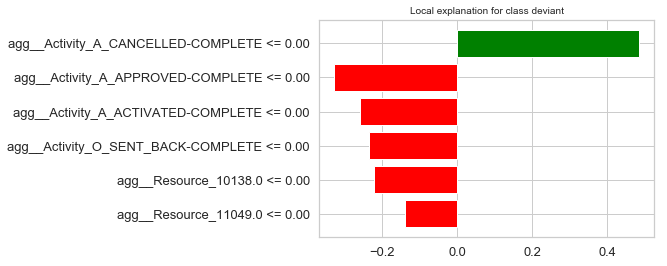

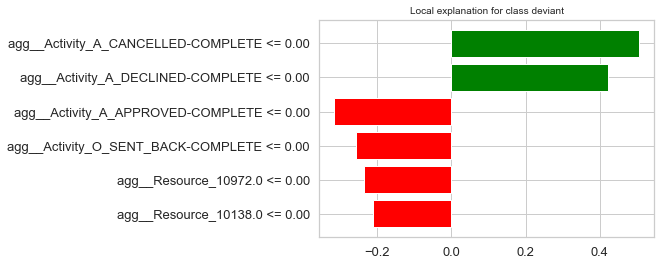

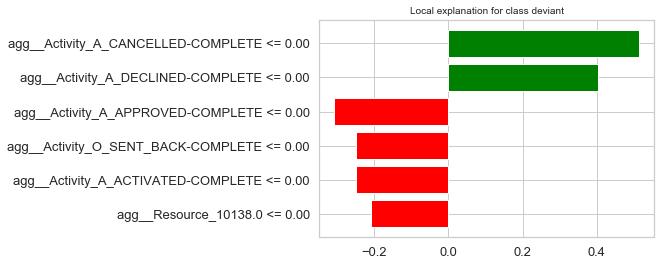

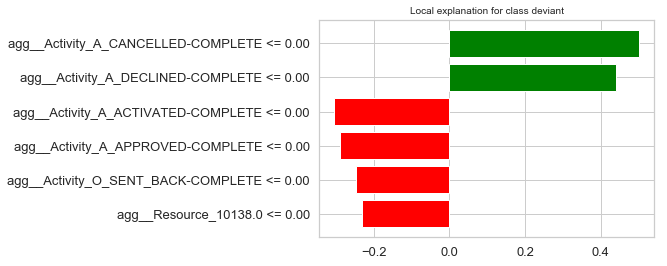

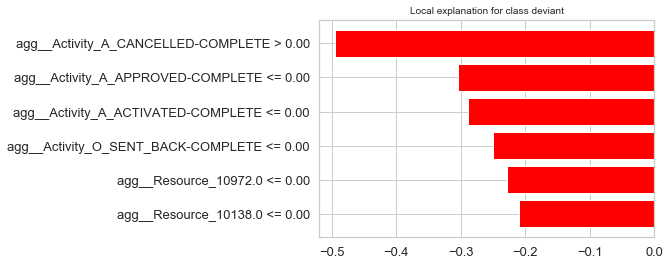

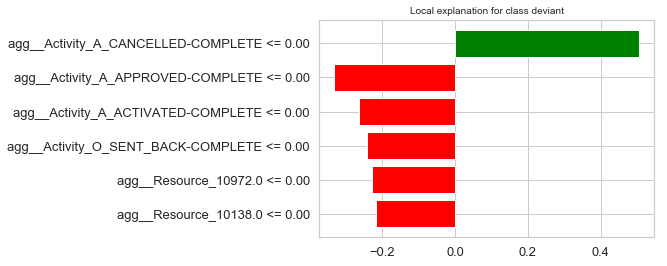

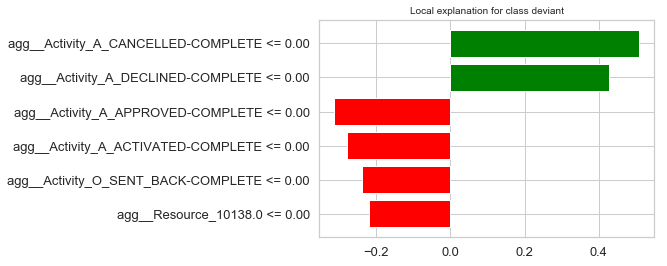

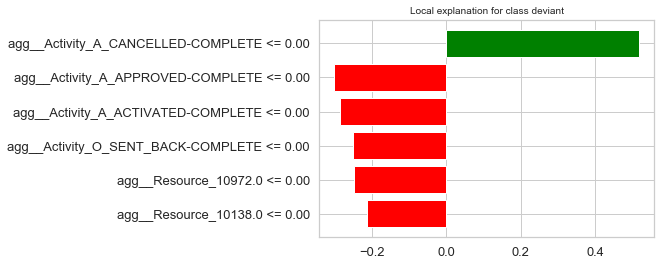

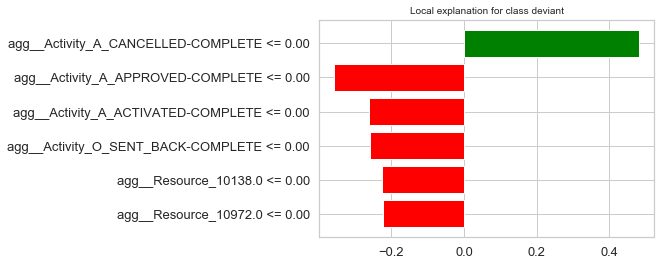

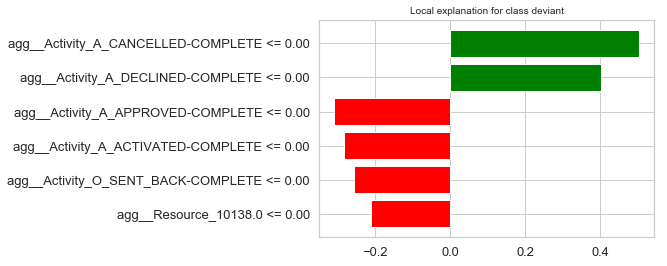

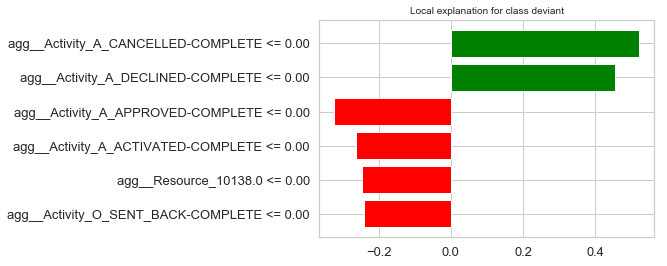

In [47]:
rc={'axes.labelsize': 12, 'xtick.labelsize': 13, 'ytick.labelsize': 13 , 'axes.titlesize': 10}
sns.set(rc)
sns.set_style("whitegrid")
%matplotlib inline
for exp in exp_rlist:
    fig = exp.as_pyplot_figure()

printing global feature importance of the random forest classifier


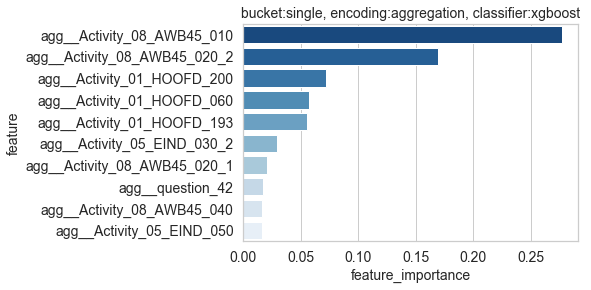

In [17]:
print('printing global feature importance of the random forest classifier') 
rc={'axes.labelsize': 14, 'xtick.labelsize': 14, 'ytick.labelsize': 14 ,'axes.titlesize': 15}
sns.set(rc)
sns.set_style("whitegrid")
var_imp_plot(importance, 'bucket:single, encoding:aggregation, classifier:xgboost', 10)

In [12]:
final_data = pd.DataFrame(trainingdata, columns=feature_combiner.get_feature_names())
final_data['target']=train_y


print("Top Absolute Correlations")
au_corr = final_data.corr().abs()
au_corr.fillna(0, inplace=True)
col_names = au_corr.columns
for i in range (0, au_corr.shape[0]):
    test = au_corr.iloc[:,i]
    relevant_feat = test[test>0.5]
    index_list = list(relevant_feat.index.values)
    for idx in index_list:
        if(idx != col_names[i] and col_names[i]=='agg__Activity_08_AWB45_020_1'):
            print(idx ,col_names[i],relevant_feat.loc[idx])



Top Absolute Correlations
agg__Activity_08_AWB45_010 agg__Activity_08_AWB45_020_1 0.9332535294024501
agg__Activity_08_AWB45_020_2 agg__Activity_08_AWB45_020_1 0.7865958172181923
agg__Activity_08_AWB45_025 agg__Activity_08_AWB45_020_1 0.6055754763503768
agg__Activity_08_AWB45_030 agg__Activity_08_AWB45_020_1 0.8233149789116349
agg__Activity_08_AWB45_040 agg__Activity_08_AWB45_020_1 0.7112266450903839
agg__question_42 agg__Activity_08_AWB45_020_1 0.8593100179753597
target agg__Activity_08_AWB45_020_1 0.5823313548814811
